In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

First I'll create a class that solves the differential equations of motion given initial conditions. To get the equations I used Lagrangian mechanics.

In [5]:
class DoublePendulum():
    def __init__(self, L1, L2, m1, m2, g):
        self.L1 = L1        #length of the first pendulum
        self.L2 = L2        #length of the second pendulum
        self.m1 = m1        #mass on the first pendulum
        self.m2 = m2        #mass on the second pendulum
        self.g = g          #acceleration due to gravity
        
    def dSdt(self, t, S):
        z1, z2, phi1, phi2 = S
        return [ ( m2*g*np.sin(phi2)*np.cos(phi1-phi2) - m2*np.sin(phi1-phi2)*(L1*z1**2*np.cos(phi1-phi2)+L2*z2**2)
                   -(m1+m2)*g*np.sin(phi1) )
                    / ( L1*(m1 + m2*np.sin(phi1-phi2)**2) ),
            
            
                ( (m1+m2) * (L1*z1**2*np.sin(phi1-phi2) - g*np.sin(phi2) + g*np.sin(phi1)*np.cos(phi1-phi2))
                   + m2*L2*z2**2 * np.sin(phi1-phi2)*np.cos(phi1-phi2) )
                    / ( L2*(m1 + m2*np.sin(phi1-phi2)**2) ),
            
            
                z1,
                z2]

    def solve(self, t, in_z1, in_z2, in_phi1, in_phi2):
        
        S0 = [in_z1, in_z2, in_phi1, in_phi2]
        sol = odeint(self.dSdt, y0=S0, t=t, tfirst=True)
        
        return sol

Now we can set the values of our constants and create a pendulum object. From here, we'll plot angle 1 and angle 2 as a function of time

In [37]:
L1 = 1
L2 = 1
m1 = 1
m2 = 1
g = 9.8

pend = DoublePendulum(L1, L2, m1, m2, g)

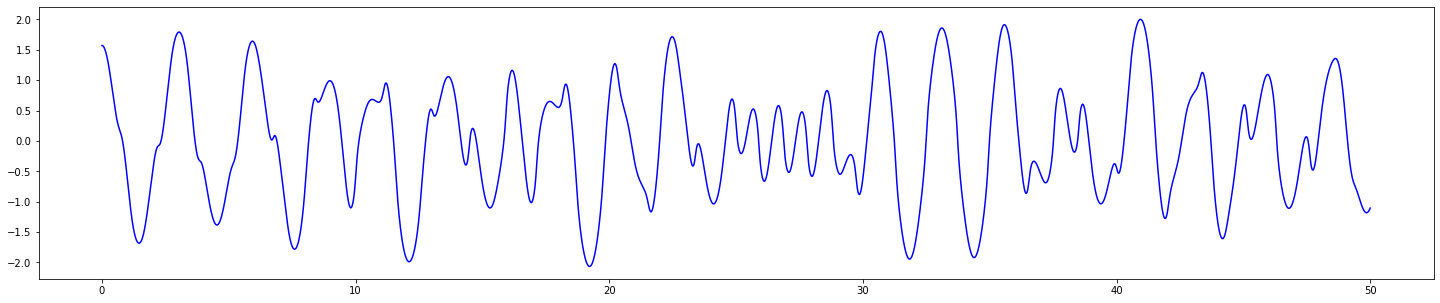

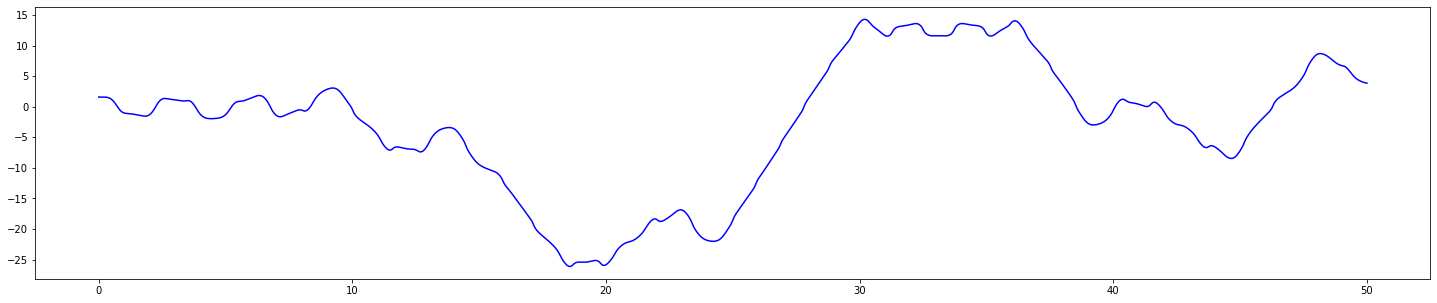

In [38]:
t = np.linspace(0, 50, 10001)

phi1_0 = np.pi/2
phi2_0 = np.pi/2 #entire pendulum starts perpendicular with vertical axis
phi1_dot_0 = 0
phi2_dot_0 = 0 #entire pendulum starts from rest

sol = pend.solve(t, phi1_dot_0, phi2_dot_0, phi1_0, phi2_0)

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(5)
plt.plot(t, sol.T[2], color='b')

f = plt.figure()
f.set_figwidth(25)
f.set_figheight(5)
plt.plot(t, sol.T[3], color='b')

Now to show that the double pendulum is chaotic. We will create another pendulum with a slightly lower angle 2 and plot the logarithmic difference of the two pendulum angles.

/var/folders/rj/8hzrn8wn2y99l93674c4hvp80000gn/T/ipykernel_79108/785944328.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log(abs(phi - alt))


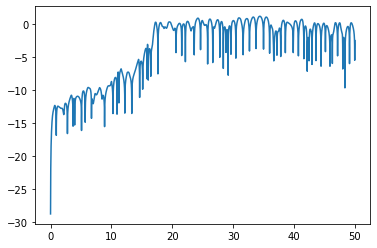

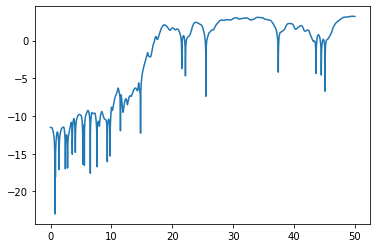

In [39]:
altsol = pend.solve(t, phi1_dot_0, phi2_dot_0, phi1_0, phi2_0-0.00001)

def logdiff(phi, alt):
    return np.log(abs(phi - alt))

plt.plot(t, logdiff(sol.T[2], altsol.T[2]))
plt.show()
plt.plot(t, logdiff(sol.T[3], altsol.T[3]))

Now we can tack the motion of the pendulum over time, and plot the resulting path:

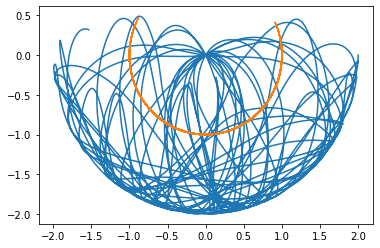

In [41]:
def x1(phi1):
    return L1 * np.sin(phi1)

def y1(phi1):
    return -L1 * np.cos(phi1)

def x2(phi1, phi2):
    return x1(phi1) + L2*np.sin(phi2)

def y2(phi1, phi2):
    return y1(phi1) - L2 * np.cos(phi2)

plt.plot(x2(sol.T[2], sol.T[3]), y2(sol.T[2], sol.T[3]))
plt.plot(x1(sol.T[2]), y1(sol.T[2]))